Size(dimension):  (513, 513, 4)


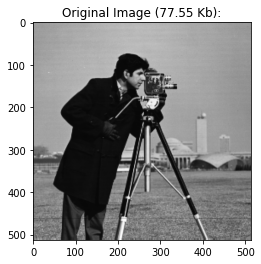

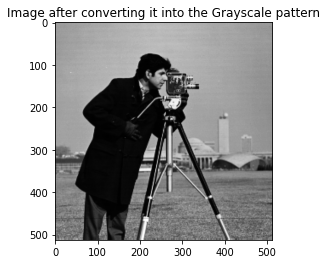

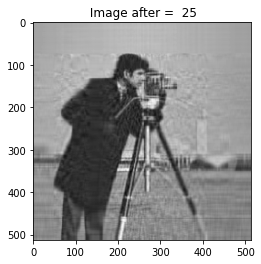

In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/cameraman.png"#complete path of the image
img = plt.imread(path)
print("Size(dimension): ",img.shape)
s = float(os.path.getsize(path))/1000
plt.title("Original Image (%0.2f Kb):" %s)
#displaying the original image
plt.imshow(img)

#converting RGB to grayscale image
R = img[:,:, 0]
G = img[:,:, 1]
B = img[:,:, 2]
imggray = 0.2989 * R + 0.5870 * G + 0.1140 * B #imggray is the grayscale image

#plotting the gray scale image
plt.figure()
plt.imshow(imggray, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

#performing SVD of imggray

U, S, Vt = np.linalg.svd(imggray) #single value decomposition

#compressing it to cmpimg by retaining only first few singular values

i=25 #retaining the first 25 singular values
#U[:, :i]) -> retaining first i columns of U
#np.diag(S[:i])-> retaining first i singular values from S
#Vt[:i,:]-> retaining first i rows of V transpose
#cmpimg is the compressed matrix
cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
#plotting the compressed image
plt.imshow(cmpimg, cmap = 'gray')
title = " Image after =  %s" %i
plt.title(title)
plt.show()
#saving the compressed image matrix as image object "result" and saving it
result = Image.fromarray((cmpimg ).astype(np.uint8))
result.save('compressed.jpg')